Para poder visualizar los árboles de decisión que entrenaremos necesitamos instalar una librearía específica

In [51]:
!pip install python-graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


## Árbol de decisión

Los árboles de decisión son modelos de Machine Learning que se pueden utilizar para **Clasificación** o para **Regresión**. En esta Notebook realizaremos un ejemplo de clasificación, y modificaremos hiperpárametros para ajustar los modelos.

Realizaremos los pasos de todo Proyecto de Ciencia de Datos

1. Definición del Problema
2. Búsqueda de datos 
3. Exploración y Limpieza de Datos
4. Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir). Dividir los datos en entrenamiento y testo con el méodo *train_test_split*
5. Entrenamiento del modelo
6. Testeo del Modelo 

##### Definición del problema

**¿Cuál será la especie de pinguino en base a determinadas características?**

##### Búsqueda de datos

El dataset que se utilizará es sobre Pinguinos donde se las variables predictoras son distintas características de los pinguinos y la variable a predecir es la *especie ("species")*. Fue extraído de [Kaggle](https://www.kaggle.com/datasets/resulcaliskan/penguins)

Este dataset es una variación del extraído de https://www.openml.org/d/42585


In [52]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv("penguins.csv")

##### Exploración y limpieza del dataset

In [54]:
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female


In [55]:
data.info()

# Vemos no hay datos nulos y hay 2 variables categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [56]:
# Convertimos en dummies las variables categóricas (no la variable a predecir)
# Comenzamos con la variable sexo

dummies_sex = pd.get_dummies(data=data["sex"], drop_first=True, prefix = "sex_")
data = data.join(dummies_sex)

In [57]:
# Convertimos la variable island

dummies_island = pd.get_dummies(data=data["island"], drop_first=True, prefix = "island_")
data = data.join(dummies_island)

In [58]:
# Eliminamos las variables que reemplazamos por las dummies

data.drop(columns= ["sex", "island"], inplace=True)
data.head(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex__Male,island__Dream,island__Torgersen
0,Adelie,39.1,18.7,181,3750,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1
2,Adelie,40.3,18.0,195,3250,0,0,1


In [59]:
# Vemos la distribución de la variable target

data["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


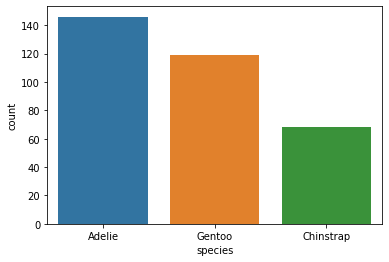

In [60]:
sns.countplot(data["species"])

#### Entrenamiento del modelo

Vamos a entrenar un modelo de Árbol de decisión para predecir la especie de Pinguino. En primer lugar dividermos los datos en **X** e **y** y en entrenamiento y testo.

Instanciaremos el modelo de Árbol de decisión con los hiperparámentros por default.

In [61]:
# Generamos X e y 

X = data.drop(columns = "species")   #variables predictora
y = data["species"]   #variable a predecir

In [62]:
# Dividimos datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=138)  #por default 25% de test


In [63]:
# Importamos el modelo que utilizaremos

from sklearn.tree import DecisionTreeClassifier


In [64]:
#Instanciamos el modelo que utilizaremosn en este caso con los hiperparámetros por default

arbol = DecisionTreeClassifier()

In [65]:
# Entrenamos el modelo 

arbol.fit(X_train, y_train)

DecisionTreeClassifier()

##### Visualización del Árbol generado por el modelo

[Text(0.6527777777777778, 0.9166666666666666, 'bill_depth_mm <= 207.0\ngini = 0.644\nsamples = 249\nvalue = [106, 54, 89]\nclass = adelie'),
 Text(0.4722222222222222, 0.75, 'species <= 44.65\ngini = 0.447\nsamples = 157\nvalue = [105, 51, 1]\nclass = adelie'),
 Text(0.2777777777777778, 0.5833333333333334, 'species <= 42.4\ngini = 0.071\nsamples = 108\nvalue = [104, 4, 0]\nclass = adelie'),
 Text(0.16666666666666666, 0.4166666666666667, 'bill_length_mm <= 16.65\ngini = 0.02\nsamples = 99\nvalue = [98, 1, 0]\nclass = adelie'),
 Text(0.1111111111111111, 0.25, 'species <= 39.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1, 0]\nclass = adelie'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]\nclass = adelie'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Gento_species'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 89\nvalue = [89, 0, 0]\nclass = adelie'),
 Text(0.3888888888888889, 0.4

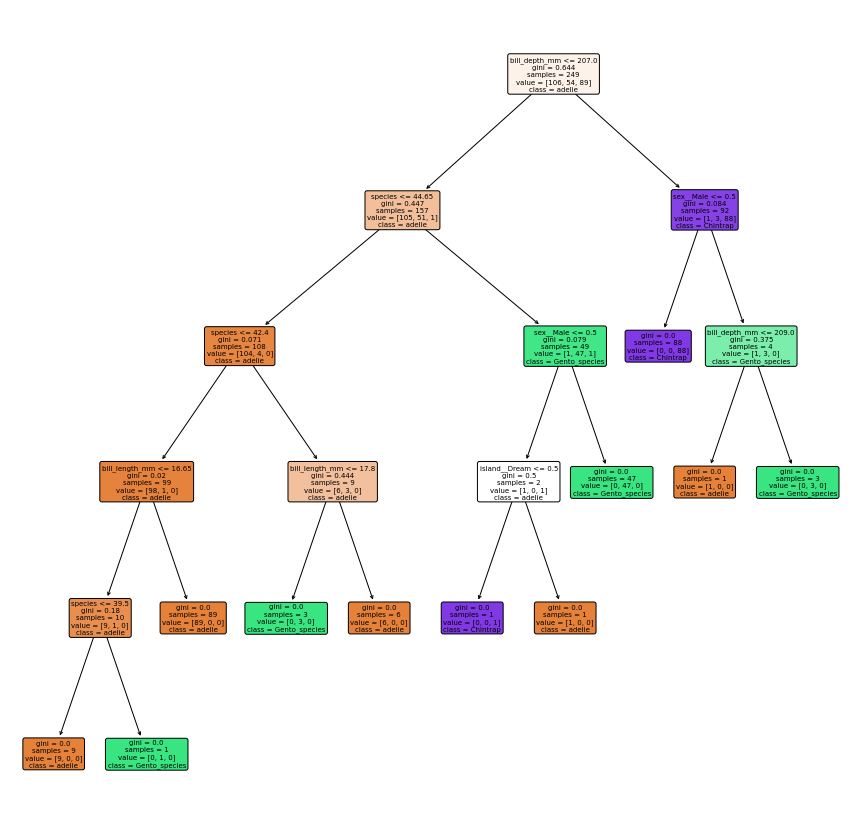

In [88]:
from sklearn import tree
class_names = ['adelie', 'Gento_species', 'Chintrap']
plt.figure(figsize = (15,15))
tree.plot_tree(arbol, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)


##### Evaluación de datos de train

En este caso, además de utilizar las métricas para evaluar los datos de testo, también utilizaremos las métricas para evaluar cómo el modelo fue entrenado, es decir, si utilizamos el método *predict* con los *X de entrenamiento* y comparamos con los *y de entrenamiento*. 

Esto no sirve para saber la performance del modelo ya que fue entrenado con los mismo datos, pero sirve para analizar cómo fue entrenado el modelo y, en el caso de los árboles de decisión, la exactitud con la que los datos se organizan.

In [89]:
from sklearn.metrics import accuracy_score

y_pred_train = arbol.predict(X_train)
exactitud_train_arbol = accuracy_score(y_train, y_pred_train)
exactitud_train_arbol

1.0

Podemos observar que el resultado de evaluar los datos de entrenamiento es perfecta

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo *predict* para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [68]:
# Probamos nuestro modelo con los datos de test

y_pred_arbol = arbol.predict(X_test)


Text(33.0, 0.5, 'Etiquetas reales')

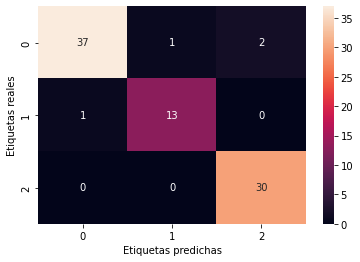

In [90]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_arbol_completo)
from sklearn.metrics import confusion_matrix

matriz_arbol = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(matriz_arbol, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [70]:
# Métrica accuracy

exactitud_arbol = accuracy_score(y_test, y_pred_arbol)
exactitud_arbol

0.9523809523809523

In [71]:
print("La exactitud del modelo árbol de decisión es", round(exactitud_arbol,2))

La exactitud del modelo árbol de decisión es 0.95


#### Hiperparámetro distintos

Al igual que el resto de los modelos vistos, también podemos entrenar modelos con distintos hiperparámetros para ver los resultados de los distintos modelos. Se puede ver en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=tree#sklearn.tree.DecisionTreeClassifier).

En el caso puntual de los algoritmos de árbol de decisión, estos tienen una tendencia al sobreajuste (overfitting), que lo veremos en profundidad la clase que viene. 
Para evitar eso es posible ajustar los distintos hiperpárametros para reducir la complejidad de los árboles, se utiliza un mecanismo denominado "poda", reduciendo el tamaño del árbol a través de limitar la profundidad máxima, limitar el número de muestraS requeridas por cada hoja o limitando el número mínimo de muestras para particionar. 

Algunos de los hiperparámetros que se pueden ajustar en el modelo de Scikit-Lear son:.

- **max_depth:** profundidad máxima del árbol. Solemos determinar una profundidad máxima para evitar que el modelo sobreajuste.  
- **min_samples_split:** número mínimo de muestras que un nodo debe contener para considerar la división. El valor predeterminado es dos. Podemos usar este parámetro para regularizar el árbol.
- **min_samples_leaf:** número mínimo de muestras necesarias para ser considerado un nodo hoja. El valor predeterminado se establece en uno. Este parámetro se utiliza como una forma alternativa de limitar el crecimiento del árbol.  
- **max_features:** número de características a considerar al buscar la mejor división. Si no se establece este valor, el árbol de decisión considerará todas las variables independientes disponibles para hacer la mejor división.

En este caso vamos a entrenar y evaluar dos modelos modificando el hiperparámetro: "max_depth" y observando la diferencia a través de las visualizaciones

In [72]:
# Instanciamos el modelo que utilizaremos con el hiperparámetro max_depth=4

arbol_depth4 = DecisionTreeClassifier(max_depth=4)

In [73]:
# Entrenamos el modelo 

arbol_depth4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6323529411764706, 0.9, 'bill_depth_mm <= 207.0\ngini = 0.644\nsamples = 249\nvalue = [106, 54, 89]\nclass = Iris-setosa'),
 Text(0.4411764705882353, 0.7, 'species <= 44.65\ngini = 0.447\nsamples = 157\nvalue = [105, 51, 1]\nclass = Iris-setosa'),
 Text(0.23529411764705882, 0.5, 'species <= 42.4\ngini = 0.071\nsamples = 108\nvalue = [104, 4, 0]\nclass = Iris-setosa'),
 Text(0.11764705882352941, 0.3, 'bill_length_mm <= 16.65\ngini = 0.02\nsamples = 99\nvalue = [98, 1, 0]\nclass = Iris-setosa'),
 Text(0.058823529411764705, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [9, 1, 0]\nclass = Iris-setosa'),
 Text(0.17647058823529413, 0.1, 'gini = 0.0\nsamples = 89\nvalue = [89, 0, 0]\nclass = Iris-setosa'),
 Text(0.35294117647058826, 0.3, 'body_mass_g <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3, 0]\nclass = Iris-setosa'),
 Text(0.29411764705882354, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Iris-versicolor'),
 Text(0.4117647058823529, 0.1, 'gini = 0.0\nsamples = 6\nvalue 

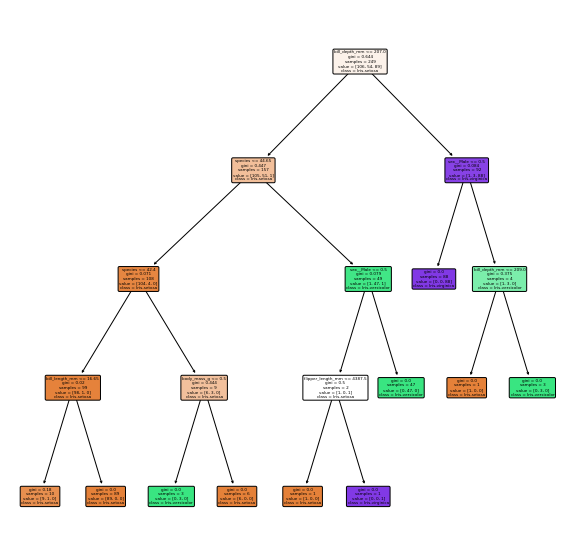

In [74]:
# Visualizamos el modelo entrenado

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize = (10,10))
tree.plot_tree(arbol_depth4, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)


##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [75]:
y_pred_train_depth4 = arbol_depth4.predict(X_train)
exactitud_train_depth4 = accuracy_score(y_train, y_pred_train_depth4)
exactitud_train_depth4

0.9959839357429718

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [76]:
# Probar nuestro modelo con los datos de test

y_pred_depth4 = arbol_depth4.predict(X_test)
y_pred_depth4

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie'], dtype=object

Text(33.0, 0.5, 'Etiquetas reales')

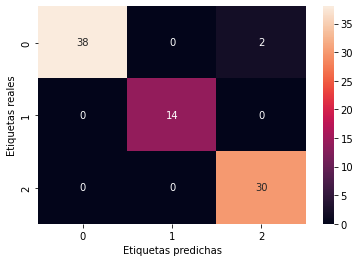

In [77]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth4)
matriz_depth4 = confusion_matrix(y_test, y_pred_depth4)
sns.heatmap(matriz_depth4, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [78]:
exactitud_depth4 = accuracy_score(y_test, y_pred_depth4)
exactitud_depth4

0.9761904761904762

In [79]:
print("La exactitud del modelo con los hiperparámetros por default es", round(exactitud_arbol,2))
print("La exactitud del modelo hiperparámetro profundidad máxima de 4 es", round(exactitud_depth4,2))

La exactitud del modelo con los hiperparámetros por default es 0.95
La exactitud del modelo hiperparámetro profundidad máxima de 4 es 0.98


#### Entrenamos nuestro modelo con otro hiperparámetro

In [80]:
# Instanciamos el modelo que utilizaremos con el hiperparámetro max_depth=2

arbol_depth2 = DecisionTreeClassifier(max_depth=2)

In [81]:
# Entrenamos el modelo 

arbol_depth2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'bill_depth_mm <= 207.0\ngini = 0.644\nsamples = 249\nvalue = [106, 54, 89]\nclass = Iris-setosa'),
 Text(0.25, 0.5, 'species <= 44.65\ngini = 0.447\nsamples = 157\nvalue = [105, 51, 1]\nclass = Iris-setosa'),
 Text(0.125, 0.16666666666666666, 'gini = 0.071\nsamples = 108\nvalue = [104, 4, 0]\nclass = Iris-setosa'),
 Text(0.375, 0.16666666666666666, 'gini = 0.079\nsamples = 49\nvalue = [1, 47, 1]\nclass = Iris-versicolor'),
 Text(0.75, 0.5, 'sex__Male <= 0.5\ngini = 0.084\nsamples = 92\nvalue = [1, 3, 88]\nclass = Iris-virginica'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 88\nvalue = [0, 0, 88]\nclass = Iris-virginica'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Iris-versicolor')]

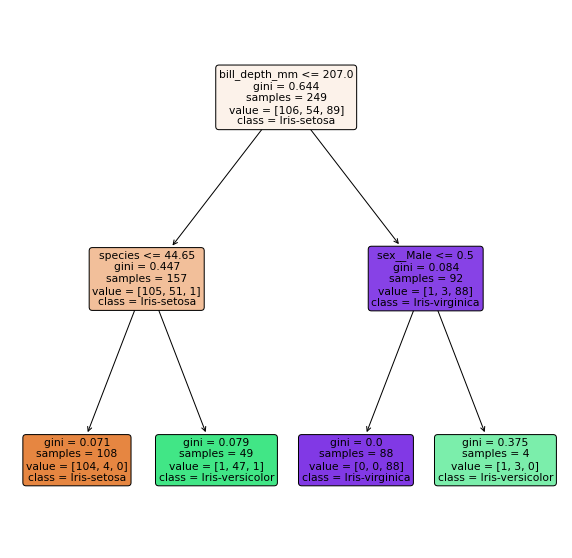

In [82]:
# Visualizamos el modelo entrenado
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize = (10,10))
tree.plot_tree(arbol_depth2, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)


##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [83]:
y_pred_train_depth2 = arbol_depth2.predict(X_train)
exactitud_train_depth2 = accuracy_score(y_train, y_pred_train_depth2)
exactitud_train_depth2

0.9718875502008032

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [84]:
# Probar nuestro modelo con los datos de test

y_pred_depth2 = arbol_depth2.predict(X_test)


Text(33.0, 0.5, 'Etiquetas reales')

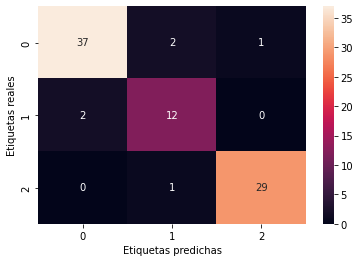

In [85]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth2)
matriz_depth2 = confusion_matrix(y_test, y_pred_depth2)
sns.heatmap(matriz_depth2, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [86]:
# Métrica accuracy

exactitud_depth2 = accuracy_score(y_test, y_pred_depth2)
exactitud_depth2

0.9285714285714286

In [87]:
# Comparamos todos los modelos

print("La exactitud del modelo con los hiperparámetros por default es", round(exactitud_arbol,2))
print("La exactitud del modelo con hiperparámetro profundidad máxima de 4 es", round(exactitud_depth4,2))
print("La exactitud del modelo con hiperparámetro profundidad máxima de 2 es", round(exactitud_depth2,2))


La exactitud del modelo con los hiperparámetros por default es 0.95
La exactitud del modelo con hiperparámetro profundidad máxima de 4 es 0.98
La exactitud del modelo con hiperparámetro profundidad máxima de 2 es 0.93
